<a href="https://colab.research.google.com/github/robertoarturomc/MetodosEstadisticos/blob/main/3_Reto_Modelado_Estadistico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reto Modelación Estadística
## 3. Variables Aleatorias Continuas

In [2]:
df <- read.csv("Customer-Churn-Records.csv")
tail(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction.Score,Card.Type,Point.Earned
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>
9995,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311
9996,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9997,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9998,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9999,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
10000,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


Pareciera que _EstimatedSalary_ es una variable Continua. Analicemos cómo se comporta.

In [7]:
mean(df$EstimatedSalary)

[1] 100090.2

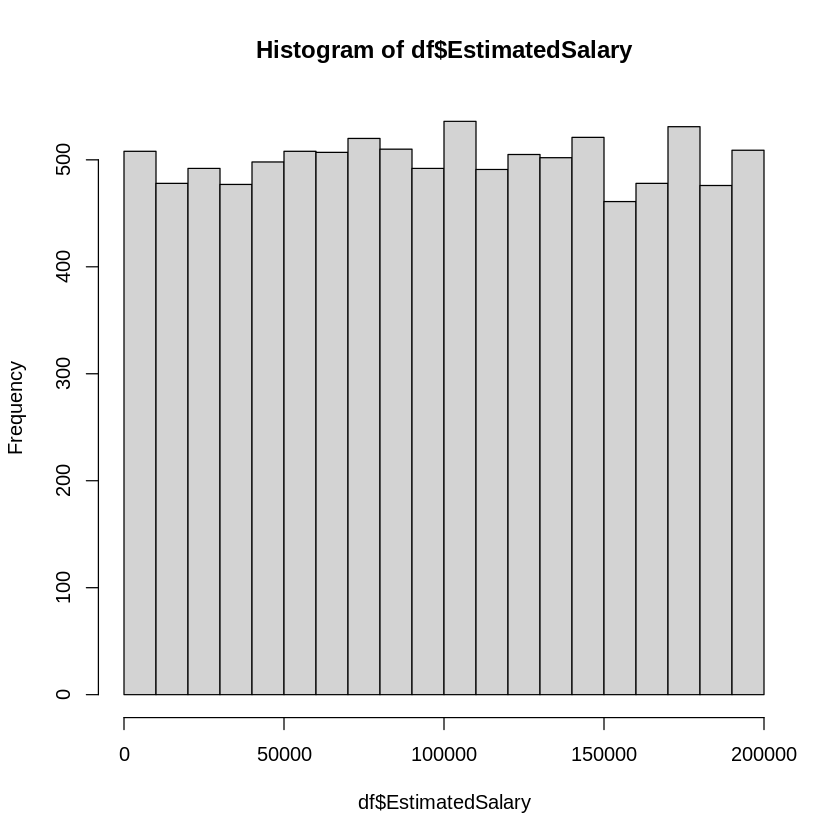

In [9]:
hist(df$EstimatedSalary)

¡Su Distribución es similar a la de una Variable Uniforme Continua! Podríamos hacer ese supuesto.

¿Recuerdas cómo era la Función de Densidad de Probabilidad?

$f_x(x) = \dfrac {1}{b-a} $ si $a<x<b$

Pues $a$ sería el valor mínimo, y $b$ el máximo

In [10]:
min(df$EstimatedSalary)

[1] 11.58

In [11]:
max(df$EstimatedSalary)

[1] 199992.5

Con estos valores podríamos hacer estimaciones. Por ejemplo, ¿cuál sería la probabilidad aproximada de que una persona gane entre \$50,000 y \$100,000 ?

In [12]:
p_50k_100k <- (100000-50000) / (max(df$EstimatedSalary) - min(df$EstimatedSalary))
p_50k_100k

[1] 0.2500239

Con lo que sabemos, esa probabilidad sería, aproximadamente del 25%

¿Y la variable *Balance*?

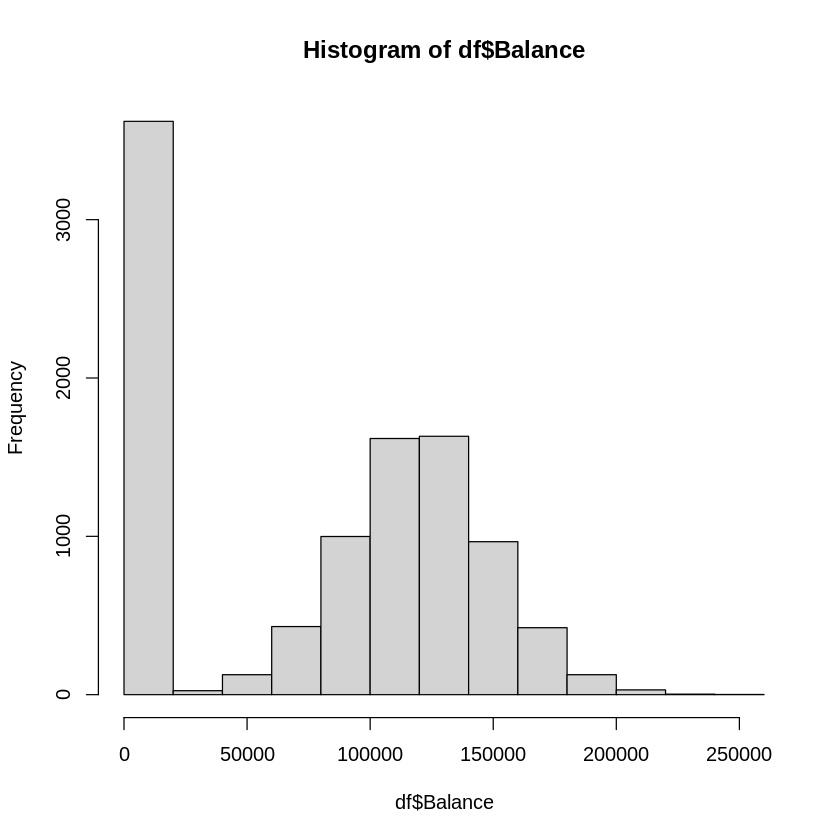

In [14]:
hist(df$Balance)

Pareciera tener dos casos. 0 en algunos casos, y para el resto, se distirbuye aproximadamente Normal.

Filtremos primero:

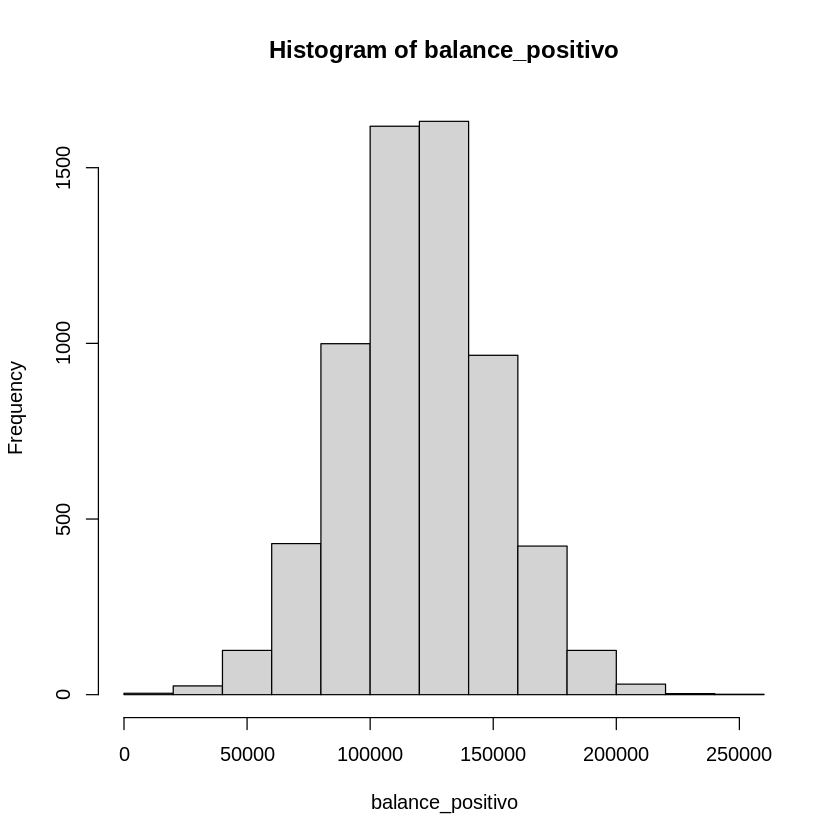

In [24]:
balance_positivo <-  df[df$Balance > 0, "Balance"]
hist(balance_positivo)

Para trabajar con una Distribución normal, necesitamos conocer sus dos parámetros: $\mu$ y $\sigma$. Es decir, la media y la varianza. POr fortuna, conocemos cómo calcular sus estimadores:

In [26]:
mu <- mean(balance_positivo)
sigma <- var(balance_positivo)

Con esta información puedes calcular probabilidades. ¿Se te ocurre algún otro uso?

Por cierto, R no necesita tablas de la Distribución Normal para estimar las funciones de Densidad y Distribución.¡Ya las trae programadas!

In [39]:
?dnorm

### Teoría del Límite Central

¡Probar este Teorema es fácil en R!

¿Qué decía este Teorema? Para un conjunto de observaciones independientes e idénticamente distribuidas, la distribución del promedio tiende a una distribución normal. Y esto sucede sea cual sea la distribución original.

¿Cómo generamos valores aleatorios de algunas distribuciones?

In [49]:
rnorm(1, mean=20, sd=5)

[1] 21.09149

In [50]:
rnorm(5, mean=20, sd=5)

[1] 11.89615 15.92920 20.39716 20.08477 17.14300

Hagamos varias pruebas, entonces.

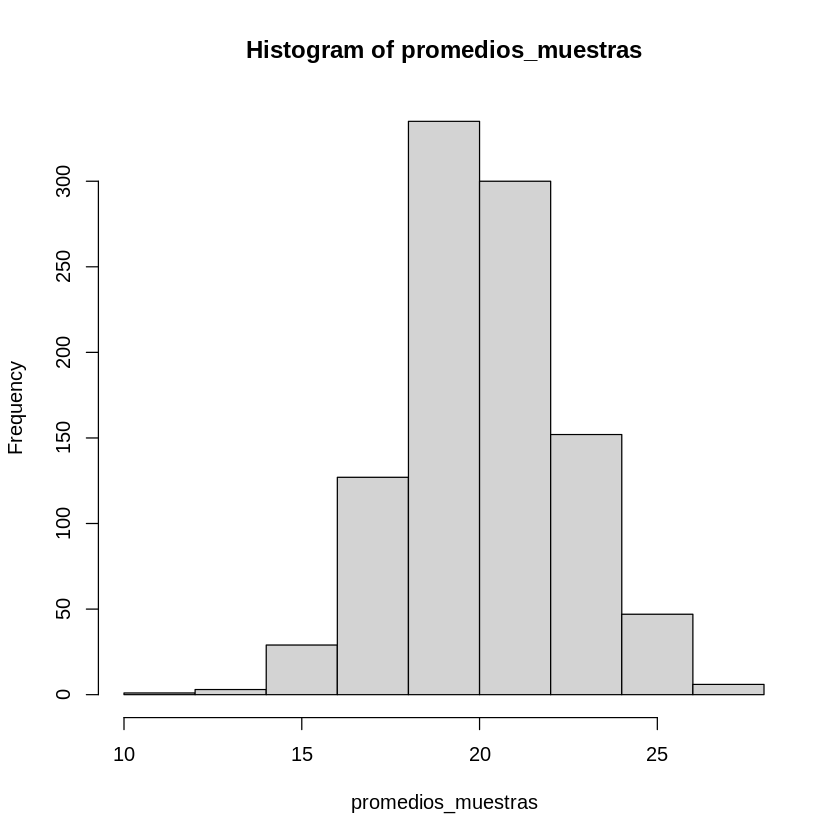

In [51]:
promedios_muestras <- c()
for (i in 1:1000) {
  muestra <- rnorm(5, mean=20, 5)
  promedios_muestras <- c(promedios_muestras, mean(muestra))
}

hist(promedios_muestras)

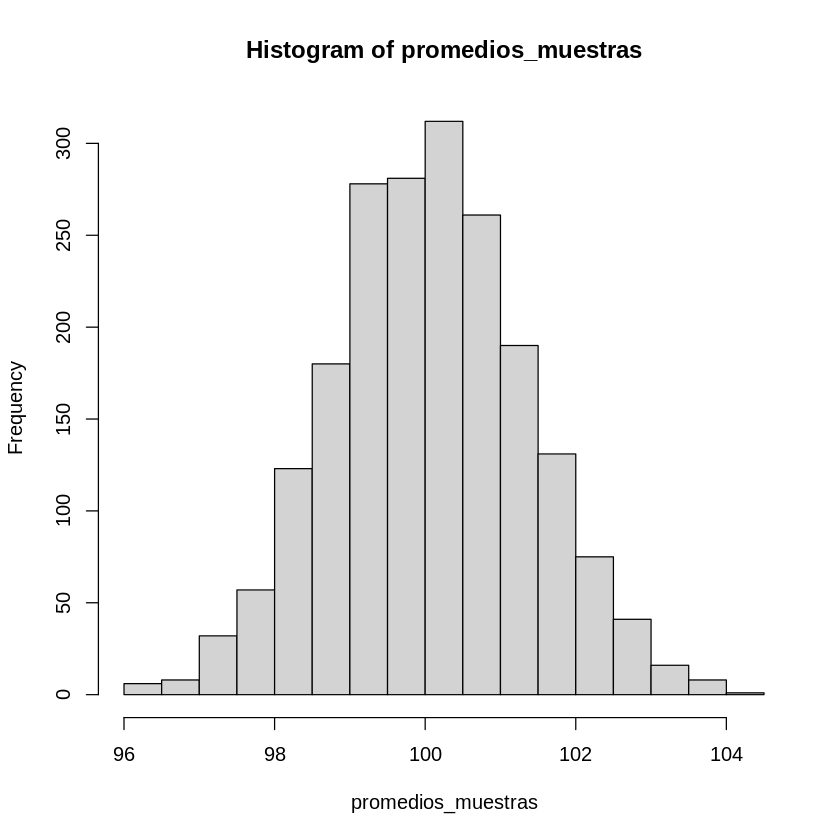

In [53]:
promedios_muestras <- c()
for (i in 1:2000) {
  muestra <- rnorm(5, mean=100, 3)
  promedios_muestras <- c(promedios_muestras, mean(muestra))
}

hist(promedios_muestras)

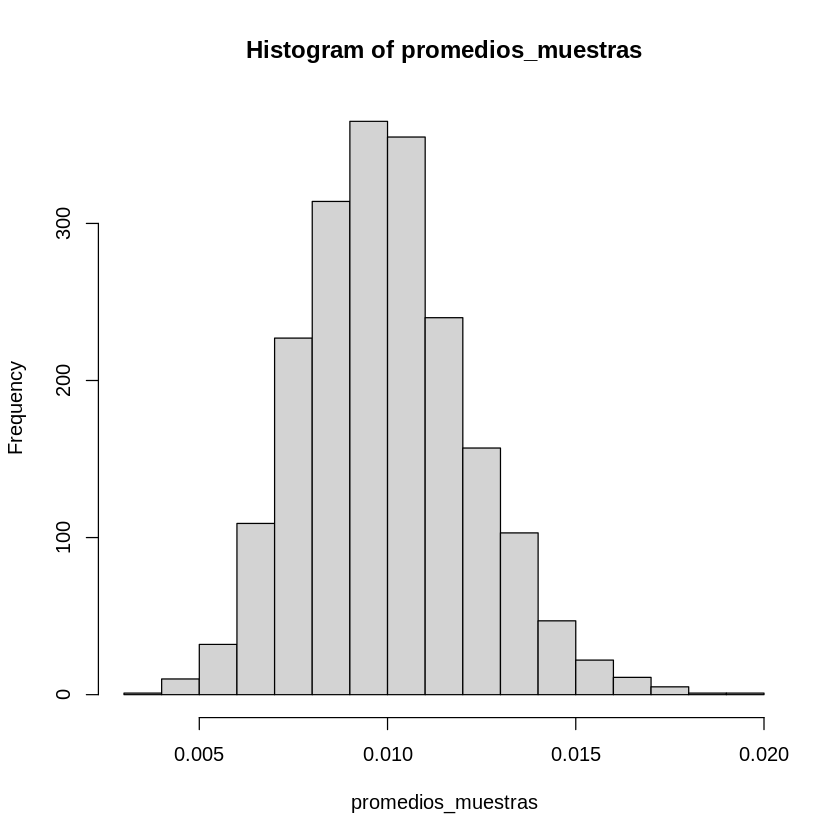

In [61]:
# Tambien, con otras distribuciones
promedios_muestras <- c()
for (i in 1:2000) {
  muestra <- rexp(20, rate=100)
  promedios_muestras <- c(promedios_muestras, mean(muestra))
}

hist(promedios_muestras)

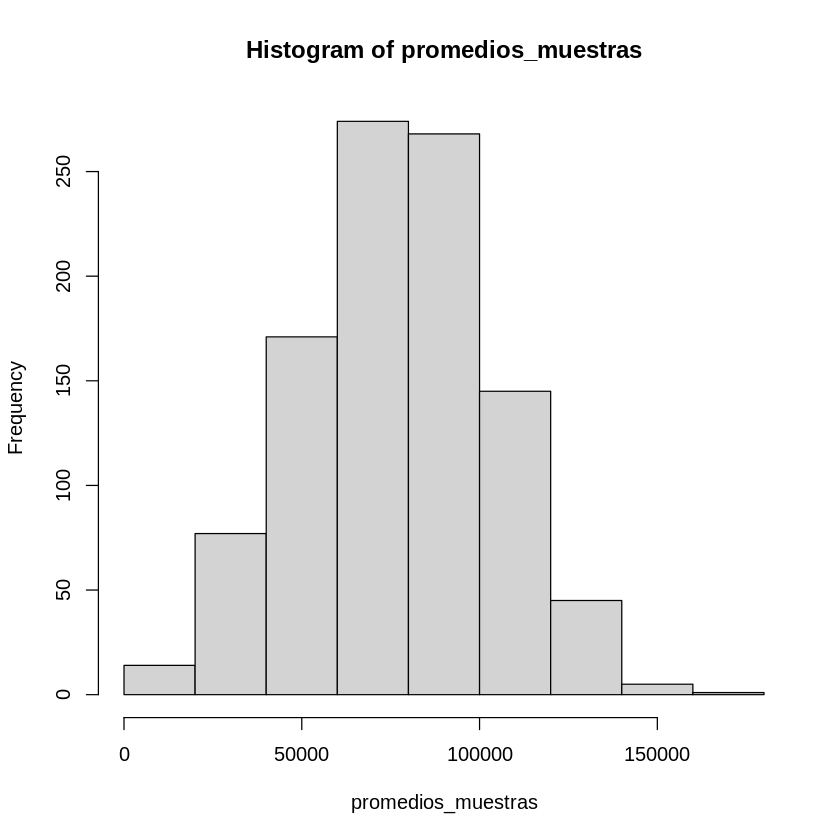

In [64]:
# Incluso, tomando elementos al azar de mi conjunto de Datos, con cualquier variable.

promedios_muestras <- c()
for (i in 1:1000) {
  muestra <- df[sample(1:nrow(df), size=5,replace=FALSE), "Balance"]
  promedios_muestras <- c(promedios_muestras, mean(muestra))
}

hist(promedios_muestras)